In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('SuicideChina.csv', index_col='Unnamed: 0')
df

,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide
...,...,...,...,...,...,...,...,...,...,...,...
2567,2567,yes,no,unknown,2010,7,male,28,primary,household,Pesticide
2568,2568,yes,no,unknown,2011,6,male,35,Secondary,farming,Pesticide
2569,2569,yes,no,unknown,2011,9,female,22,Secondary,unemployed,Other poison
2570,2570,yes,no,unknown,2010,8,female,50,Secondary,farming,Pesticide


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571 entries, 1 to 2571
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Person_ID     2571 non-null   int64 
 1   Hospitalised  2571 non-null   object
 2   Died          2571 non-null   object
 3   Urban         2571 non-null   object
 4   Year          2571 non-null   int64 
 5   Month         2571 non-null   int64 
 6   Sex           2571 non-null   object
 7   Age           2571 non-null   int64 
 8   Education     2571 non-null   object
 9   Occupation    2571 non-null   object
 10  method        2571 non-null   object
dtypes: int64(4), object(7)
memory usage: 241.0+ KB


In [11]:
sns.displot(df.Age, kde=True)

### Queries
> Which `year` has more rate of suicide
>  
> Is its rate is increasing with passage of time 
>
> Which `gender` is more intended to suicide
>
> Does `Age` factor has any relation with the `Suicide`
>
> Does `Suicide` has any relation with the `Eduaction` 
> 
> Does `Suicide` has any relation with the `Occuption`
>
> Which **method** is popular for commiting Suicide 
>
> Which `method` has more mortality rate


In [44]:
df.columns

Index(['Person_ID', 'Hospitalised', 'Died', 'Urban', 'Year', 'Month', 'Sex',
       'Age', 'Education', 'Occupation', 'method', 'Age_group'],
      dtype='object')

### Urban

In [33]:
df.Urban.value_counts()

no         2213
yes         277
unknown      81
Name: Urban, dtype: int64

<AxesSubplot:xlabel='Urban', ylabel='count'>

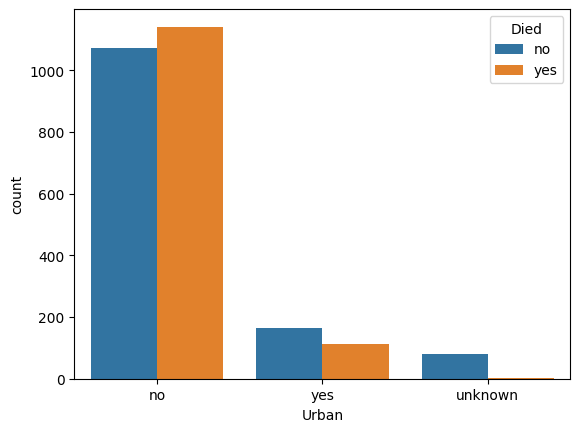

In [37]:
sns.countplot(data=df,x='Urban', hue='Died')

> People of rural areas are more attracted toward suicide 

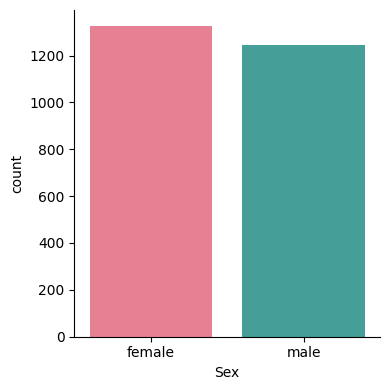

In [49]:
ax=sns.catplot(x='Sex',kind='count', height=4, palette='husl', data=df)
ax

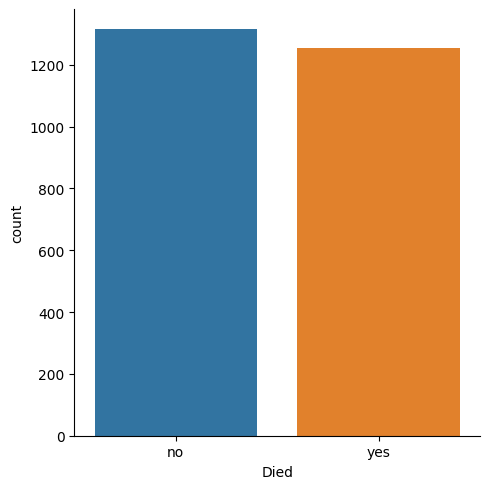

In [17]:
sns.catplot(data=df, x='Died', kind='count')

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hospitalised', ylabel='count'>

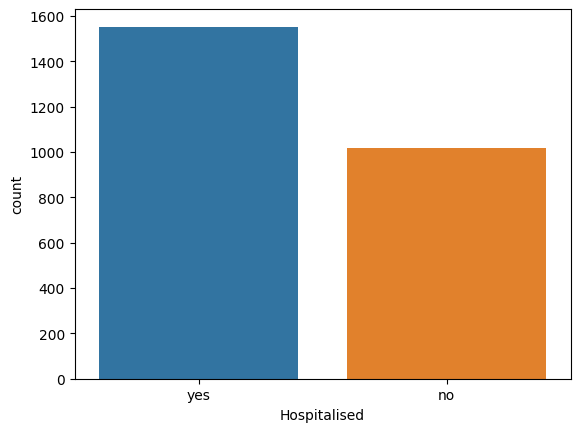

In [19]:
sns.countplot(df.Hospitalised)

### Year

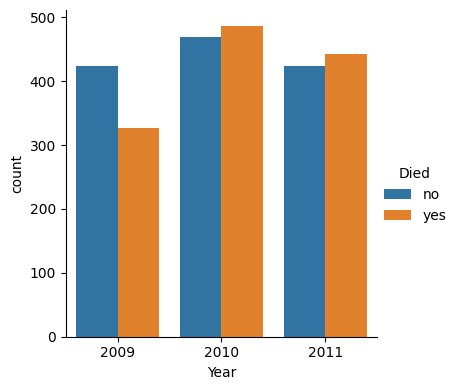

In [23]:
sns.catplot(data=df,x='Year', hue='Died', kind='count',height=4 )

In 2010 people commit more suicide than other two years. More poeple died in in 2010 and 2011 while there are more people who saved their lives after commiting sucide in 2009 

### Gender

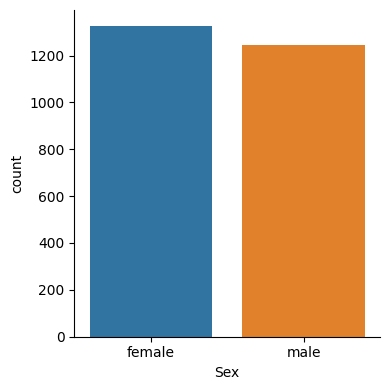

In [52]:
ax=sns.catplot(data=df, x='Sex',kind='count', height=4, ci=None)

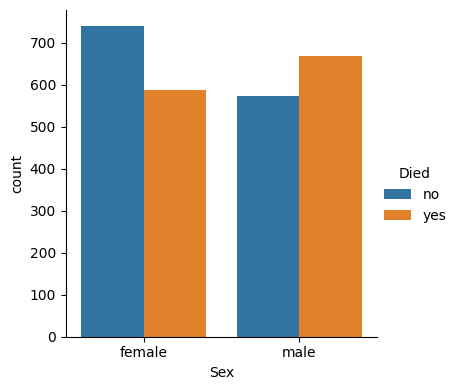

In [48]:
fig=sns.catplot(data=df, x='Sex',hue='Died', kind='count', height=4)

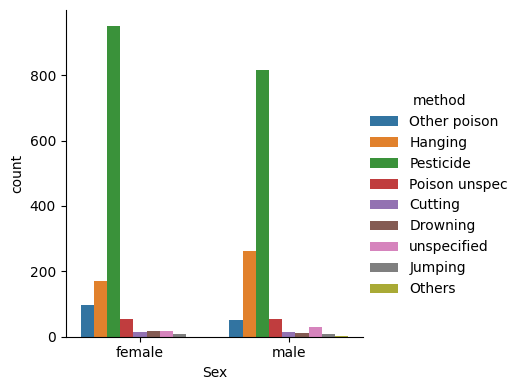

In [42]:
sns.catplot(data=df, x='Sex', hue="method",kind='count', height=4)

Use of pesticide drugs are most common method for suicide. Hanging is at second number 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Secondary'),
  Text(1, 0, 'primary'),
  Text(2, 0, 'iliterate'),
  Text(3, 0, 'unknown'),
  Text(4, 0, 'Tertiary')])

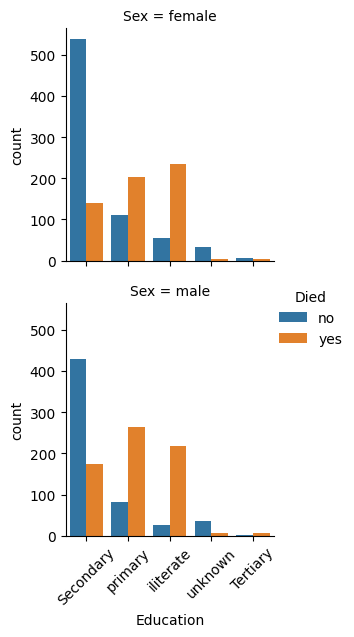

In [31]:
sns.catplot(data=df,x='Education', hue='Died',row='Sex',kind='count', height=3)
plt.xticks(rotation=45)

### Age Group

> Child   <  18
> 
>18<= young >35
>
>35<= adult >60
>
> Old >= 60 

In [8]:
age_groups = []
for x in df.Age:
    if x < 18:
        age_groups.append('child')
    elif 18 <= x < 35:
        age_groups.append('young')
    elif 35 <= x < 60:
        age_groups.append('Adult')
    else:
        age_groups.append('old')

df['Age_group'] = age_groups


In [10]:
df.Age_group.value_counts()

Adult    1014
old       982
young     540
child      35
Name: Age_group, dtype: int64

<AxesSubplot:xlabel='Age_group', ylabel='count'>

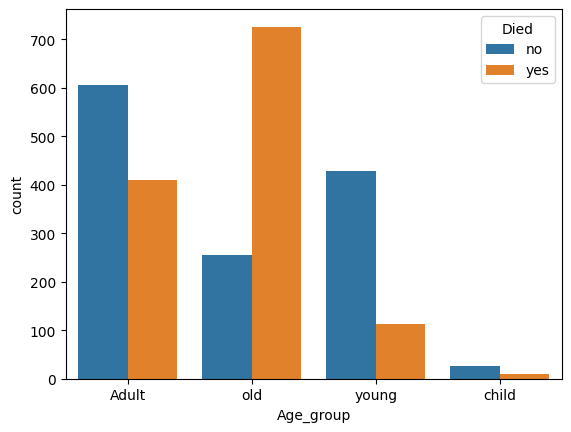

In [13]:
sns.countplot(x='Age_group', hue='Died', data=df)

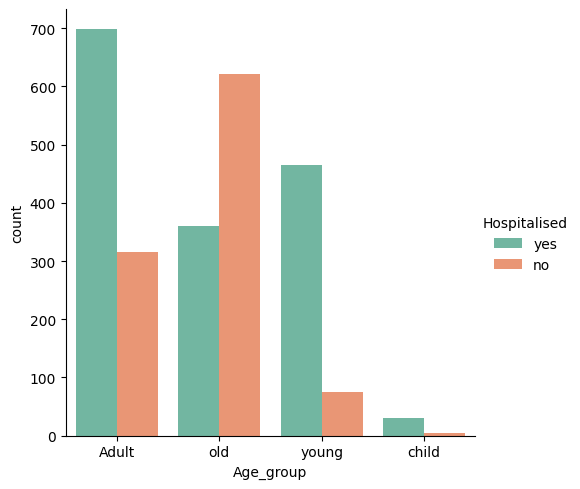

In [21]:
sns.catplot(x="Age_group", hue="Hospitalised",kind='count',palette='Set2' , data=df)

> Old people are more vulnerable to die after committing suicide and any other age group. 

### Occupation

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'household'),
  Text(1, 0, 'farming'),
  Text(2, 0, 'others/unknown'),
  Text(3, 0, 'professional'),
  Text(4, 0, 'unemployed'),
  Text(5, 0, 'business/service'),
  Text(6, 0, 'student'),
  Text(7, 0, 'worker'),
  Text(8, 0, 'others'),
  Text(9, 0, 'retiree')])

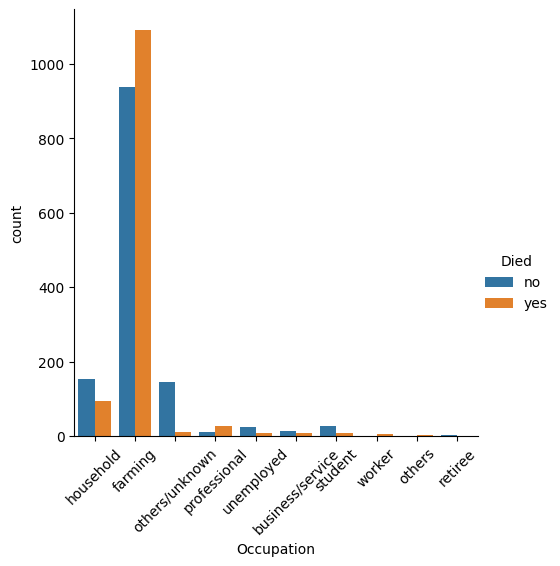

In [9]:
sns.catplot(data=df,x='Occupation', hue='Died', kind='count')
plt.xticks(rotation=45)

### Method

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Other poison'),
  Text(1, 0, 'Hanging'),
  Text(2, 0, 'Pesticide'),
  Text(3, 0, 'Poison unspec'),
  Text(4, 0, 'Cutting'),
  Text(5, 0, 'Drowning'),
  Text(6, 0, 'unspecified'),
  Text(7, 0, 'Jumping'),
  Text(8, 0, 'Others')])

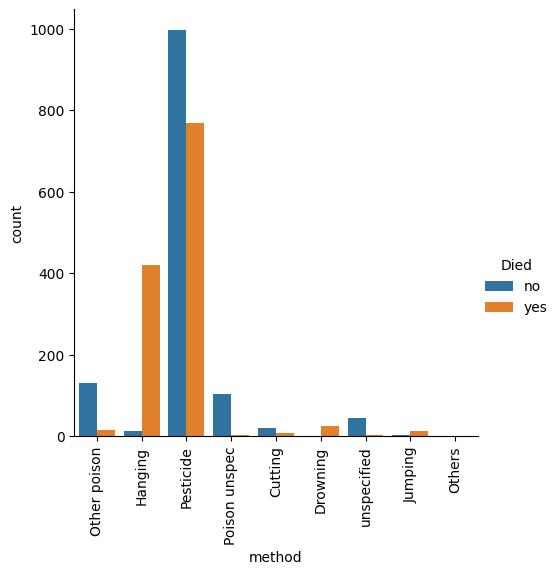

In [18]:
sns.catplot(x='method', hue='Died',kind='count', data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Other poison'),
  Text(1, 0, 'Hanging'),
  Text(2, 0, 'Pesticide'),
  Text(3, 0, 'Poison unspec'),
  Text(4, 0, 'Cutting'),
  Text(5, 0, 'Drowning'),
  Text(6, 0, 'unspecified'),
  Text(7, 0, 'Jumping'),
  Text(8, 0, 'Others')])

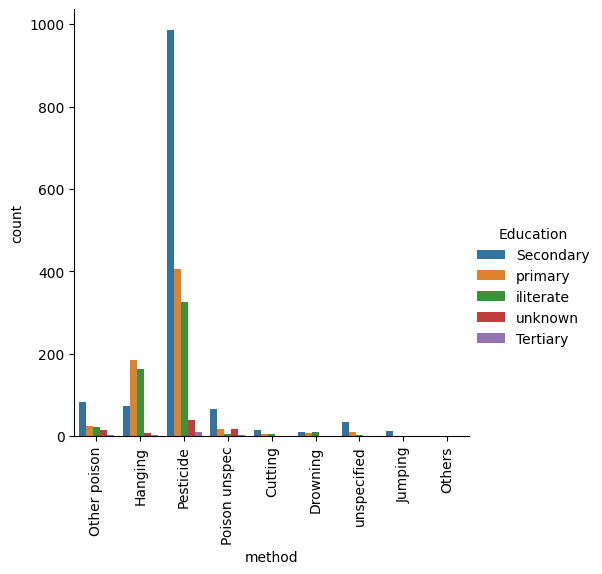

In [25]:
sns.catplot(x='method', hue='Education',kind='count', data=df)
plt.xticks(rotation=90)